In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 1.数据导入及清洗

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

### 1.1数据导入

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


### 1.2数据清洗

#### 1.2.1更改列标题

In [5]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


#### 1.2.2缺失值检验及处理

In [6]:
#缺失值检验
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   106 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [8]:
## 删除缺失行
df.drop([105,106],axis=0,inplace=True)#将第106行删掉且不保留改动前的df版本

In [9]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
# 将Month转为datatime
df['Month']=pd.to_datetime(df['Month'])#将日期转为pandas中的datetime类型的时间类型（规范时间）

In [11]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
df.set_index('Month',inplace=True)#使用现有列（'Month'列）设为dataframe索引

In [13]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [14]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## 2.平稳性检验

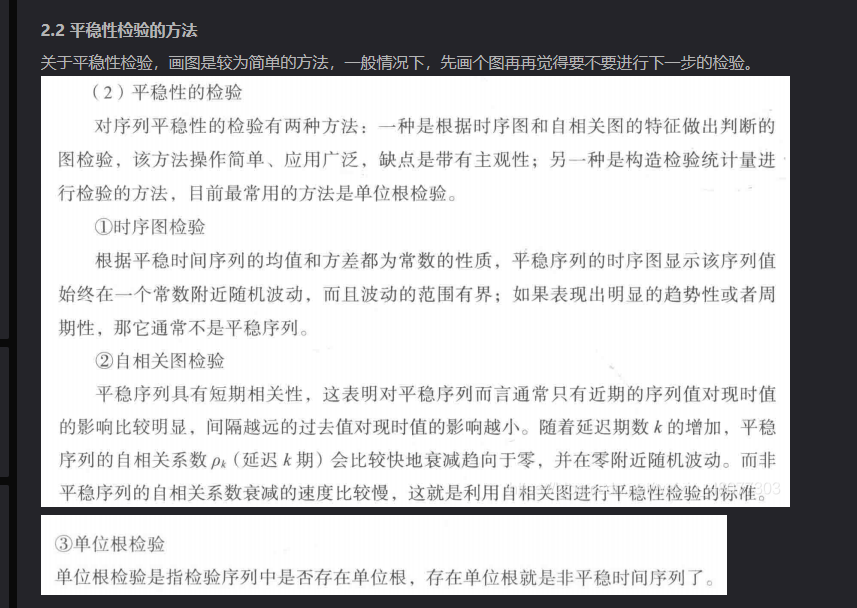
https://blog.csdn.net/weixin_48077303/article/details/115524691

### 2.1时序图检验

<AxesSubplot:xlabel='Month'>

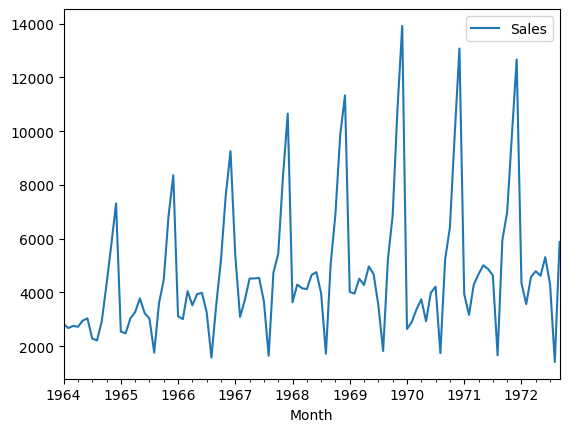

In [15]:
df.plot()

### 2.2自相关图ACF检验

-------------------------------------------------- 未平稳数据ACF与PACF --------------------------------------------------


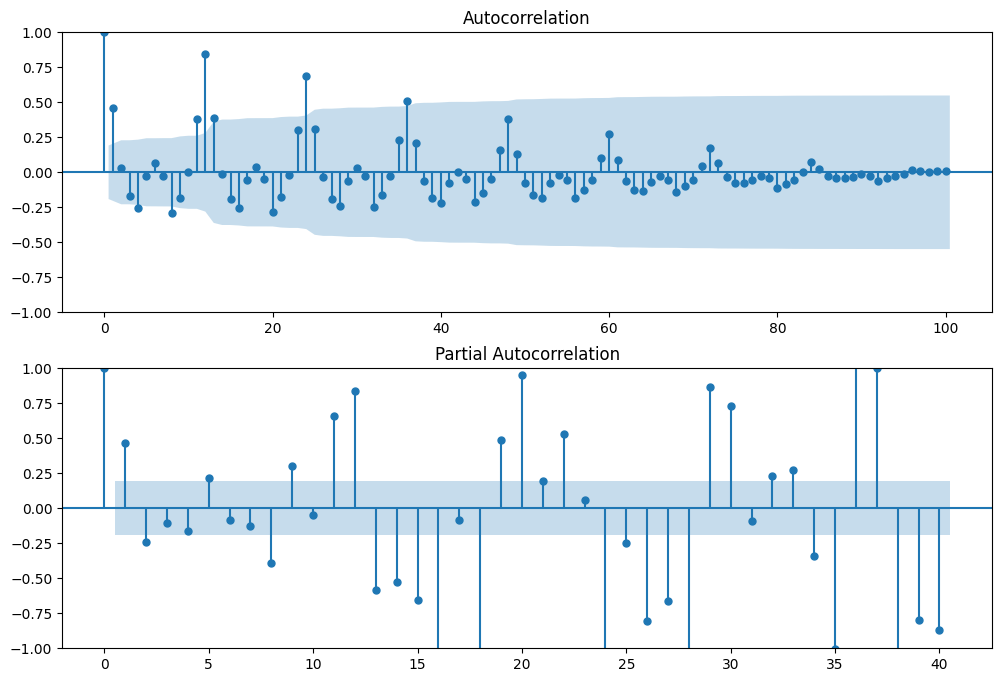

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
print("-"*50,"未平稳数据ACF与PACF","-"*50)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Sales'], lags=100,ax = ax1)
ax2 = fig.add_subplot(212)
plot_pacf(df['Sales'], lags=40,ax = ax2)
plt.show()

### 2.3单位根检验/ADF检验

In [17]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sales'])

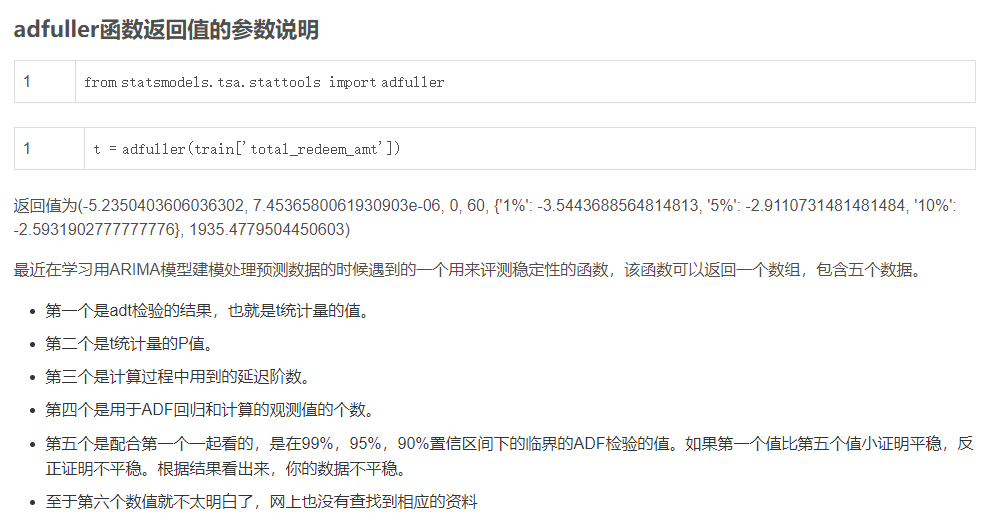
https://blog.csdn.net/sinat_40572875/article/details/128077655

In [18]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [19]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276184
p-value : 0.36391577166024713
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


综上，三种检验都验证出'Sales’序列是非平稳性。

## 3.数据平稳化-差分

### 3.1差分操作

In [20]:
df['Sales First Difference'] = df['Sales'].diff(1)#销量一阶差分

In [21]:
df['Seasonal First Difference']=df['Sales'].diff(12)#销量十二阶差分（年度）

In [22]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


### 3.2数据平稳性检验（三选一）

本次选择的是ADF检验

In [23]:
adfuller_test(df['Sales First Difference'].dropna())#dropna()删除缺失值

ADF Test Statistic : -7.189896448050991
p-value : 2.5196204473871814e-10
#Lags Used : 11
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [24]:
adfuller_test(df['Seasonal First Difference'].dropna())#dropna()删除缺失值

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


综上，ADF检验验证出'Sales First Difference'和'Seasonal First Difference’序列是非平稳性。

## 4.定阶+模型训练

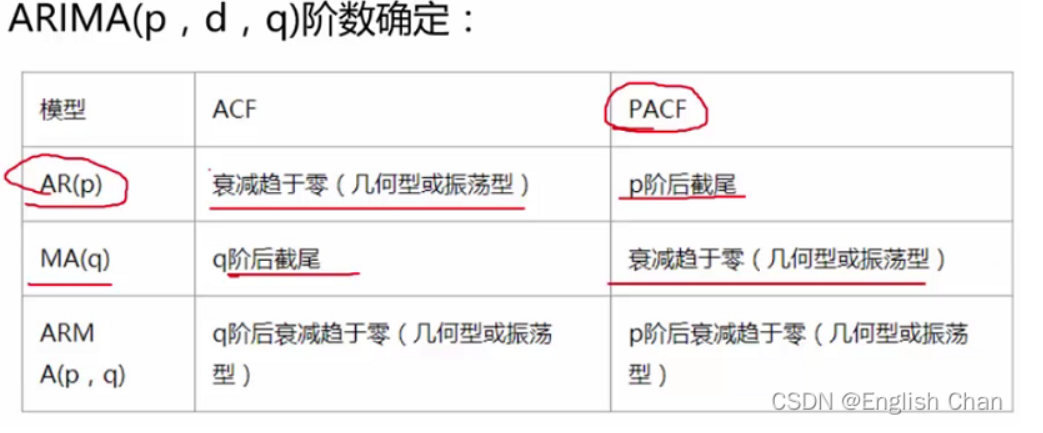
https://blog.csdn.net/weixin_49583390/article/details/121914303

在2.2中由图知，order的p,d,q,分别为1；然后确定季节性参数P,D,Q,m

### 4.1确定季节性参数

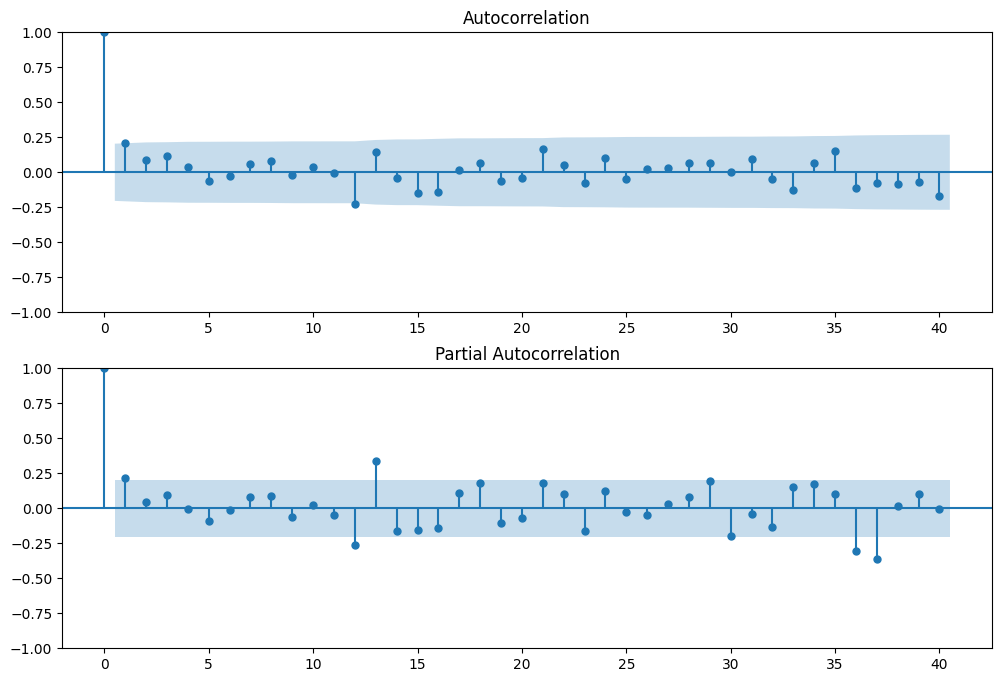

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

由上图知，季节性参数P,D,Q,m分别为1,1,1,12

### 4.2 SARIMAX训练

In [26]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

D:\apps\Anaconda3\envs\weather-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\apps\Anaconda3\envs\weather-gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


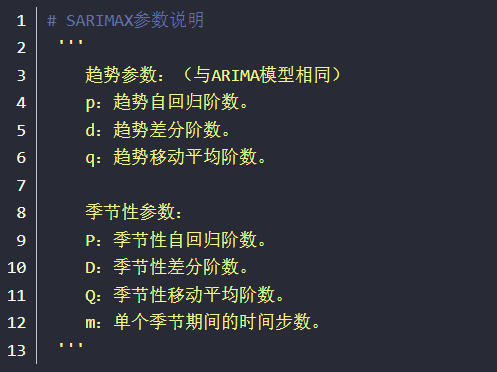
https://blog.csdn.net/cxg1105553864/article/details/91693158

<AxesSubplot:xlabel='Month'>

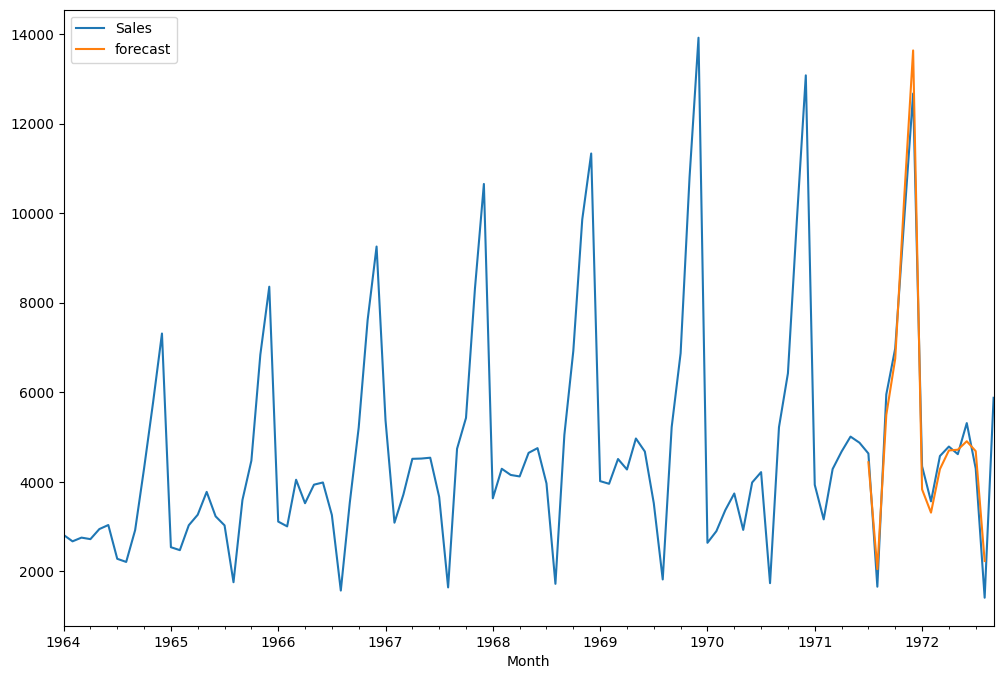

In [27]:
df['forecast']=results.predict(start=90,end=103,dynamic=True) #predict函数的参数dynamic=True则为样本内预测 
df[['Sales','forecast']].plot(figsize=(12,8))

## 5.残差图的绘制与残差独立正态性检验

### 5.1残差图的绘制

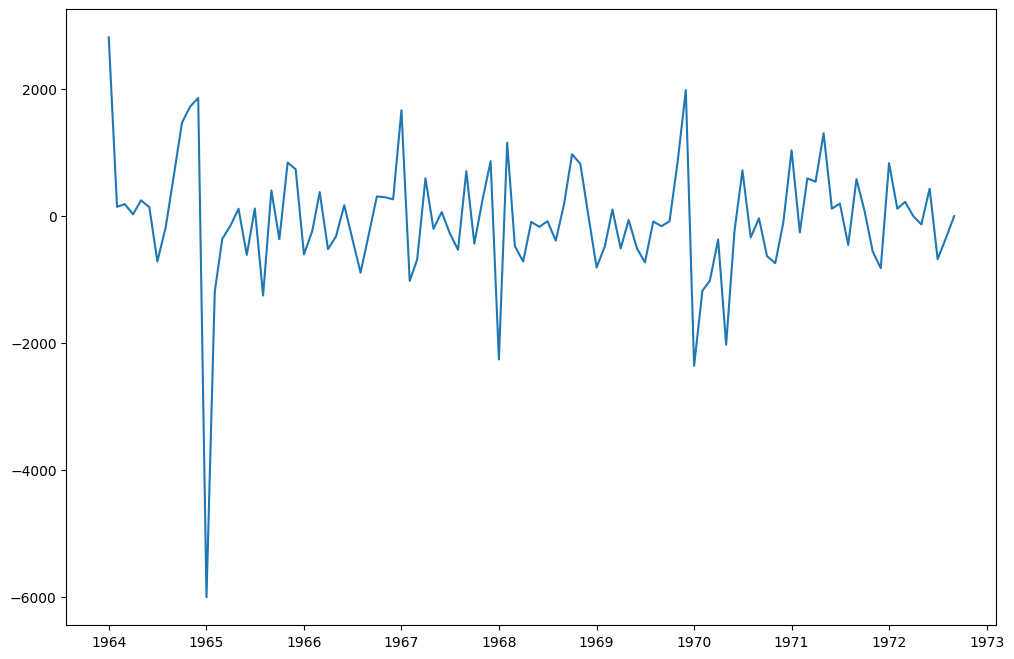

In [28]:
resid = results.resid
plt.figure(figsize=(12,8))
plt.plot(resid)

### 5.2 残差正态性检验

In [29]:
stats.normaltest(resid)

NormaltestResult(statistic=65.80388121370413, pvalue=5.138883243495742e-15)

综上，p<0.05，认为残差具有正态性

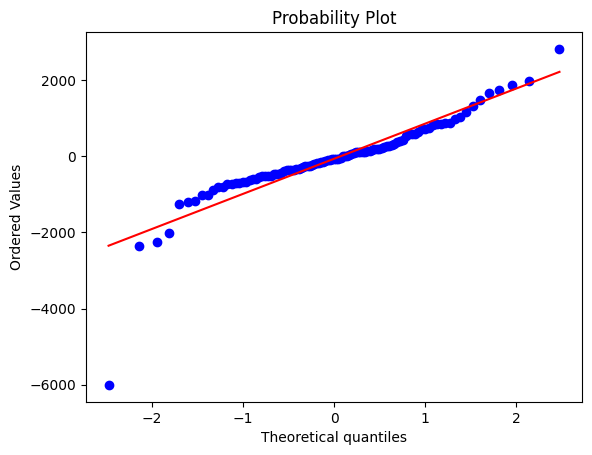

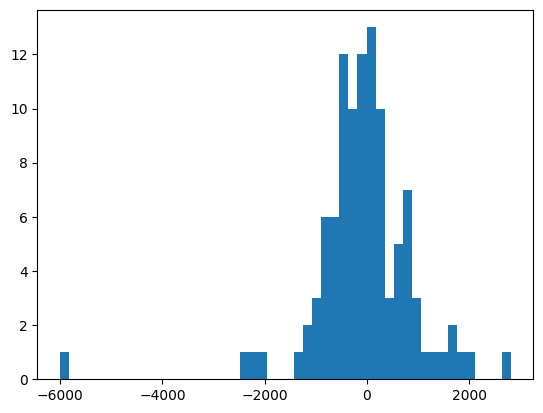

In [30]:
stats.probplot(resid, dist="norm", plot=plt)
plt.show()
plt.hist(resid,bins=50)
plt.show()

qq图散点基本在直线上，同时直方图也呈现正态性

### 5.3残差独立性检验

In [31]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(results.resid.values)     ##DW检验：靠近2——正常；靠近0——正自相关；靠近4——负自相关

1.895994074713975

DW值非常靠近2，说明序列不具有相关性

## 6.预测

### 6.1扩充表格

In [32]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]#向后扩充两年的日期

In [33]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)#向后扩充两年的df

In [34]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [35]:
future_df=pd.concat([df,future_datest_df])#合并表格

### 6.2预测并绘图

<AxesSubplot:>

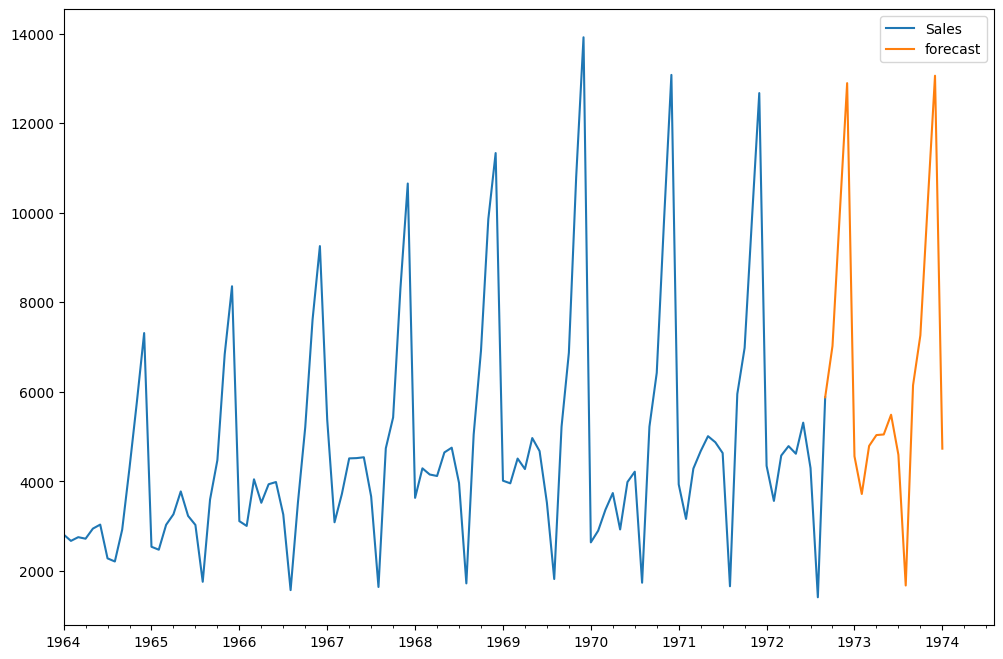

In [36]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 